### Exercise 1
Create a program that computes the linear regression of some data.

#### Mathematical Context

Linear regression notations
- $m \equiv$ # of training examples
- $x \equiv$ input variables / features
- $y \equiv$ output variable / target
- $(x,y) \equiv$ a single training example
- $(x^{(i)}, y^{(i)}) \equiv$ the i'th training example

The hypothesis function $h$

$ h: h(x) = y $

$h_{\theta}(x) = \theta_0 + \theta_1x$

$\theta_i$'s are called the *parameters* of the model.

Idea: choose $\theta_0,\, \theta_1$ so that $h_{\theta}(x)$ is close to $y$ for the training examples $(x,y)$.

Minimize $\sum_{i=1}^m \left( h_{\theta}(x^{(i)})- y^{(i)}\right)^2$

The **cost function** is given by
$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 $$

This is the *squared error* cost function.

**Gradient Descent** is the procedure below:

$$ \theta_{j} := \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) $$
where $\alpha$ is called the *learning rate*.

It is the case that the squared cost function always has a single minimum, which is the global minimum.

*<u>Batch</u> Gradient Descent* refers to the fact that each step of gradient descent uses all the training examples.

$$ \theta_0 = \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) $$
$$ \theta_1 = \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)x^{(i)} $$

Recall,
$$ h_{\theta}(x) = \theta_0 + \theta_1x $$

In [8]:
using CSV
using DataFrames
using Plots

In [2]:
path = "./datasets/house_prices_and_area.csv"
df = CSV.read(path, DataFrame)

display(first(df, 5))

5×2 DataFrame
 Row │ Price   Area  
     │ Int64   Int64 
─────┼───────────────
   1 │ 114300   1790
   2 │ 114200   2030
   3 │ 114800   1740
   4 │  94700   1980
   5 │ 119800   2130

In [3]:
size(df)[1]

128

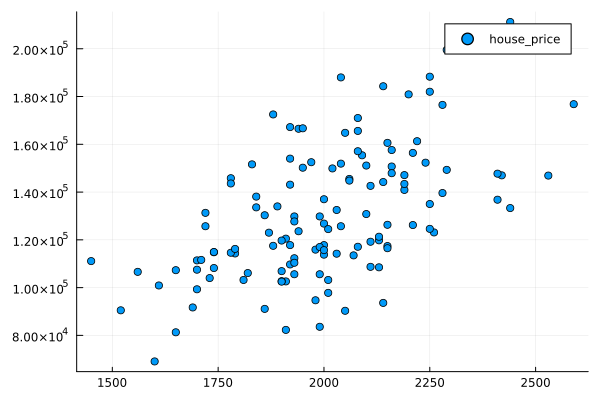

In [4]:
x = df[!, "Area"]
y = df[!, "Price"]

plot(x, y, seriestype=:scatter, label="house_price")

In [5]:
function linear_regression(df, θ0=0, θ1=0, α=1e-5, err=-1)
    # given guesses θ0 and θ1, and the learning rate α,
    # returns θ0 and θ that minimize the error function
    
    m = size(df)[1]
    
    h(x) = θ0 + θ1*x
    
    J(θ0, θ1) = sum([(1/(2*m))*( h(df[i,2]) - df[i,1] )^2 for i ∈ size(df)[1]])
    
    sqerr = J(θ0, θ1)
    
    if sqerr == err
        print("error: ", sqerr, "\n")
        print("θ0: ", θ0, "\n")
        print("θ1: ", θ1, "\n")
        return (θ0, θ1)
        
    else
        err = sqerr
        θ0 = θ0 - α*sum([(1/m)*( h(df[i,2]) - df[i,1] ) for i ∈ size(df)[1]])
        θ1 = θ1 - α*sum([(1/m)*( h(df[i,2]) - df[i,1] )*df[i,2] for i ∈ size(df)[1]])
        
        linear_regression(df, θ0, θ1, α, err)
    end
end

linear_regression (generic function with 5 methods)

error: 8.271806125530277e-25
θ0: 0.024612342740154284
θ1: 55.37776683895878


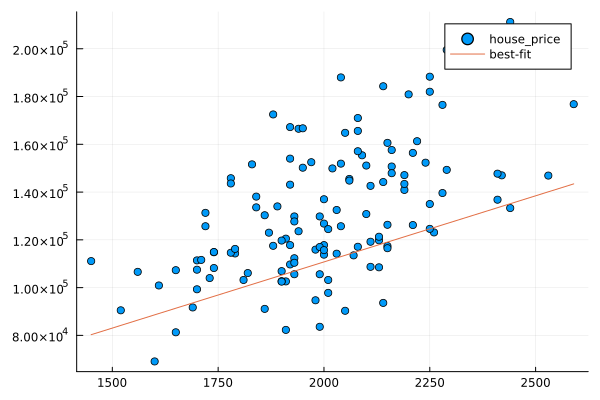

In [6]:
θ0, θ1 = linear_regression(df)

x = df[!, "Area"]
y = df[!, "Price"]
y2(x) = θ0 + θ1*x

plot(x, y, seriestype=:scatter, label="house_price")
plot!(x, y2, label="best-fit")